In [12]:
import numpy as np
L = np.array([[7/20, 0, 0, 0, 1, 0],
    [4/25, 11/50, 0, 0, 0, 0],
    [0, 37/100, 457/1000, 0, 0, 0],
    [0, 0, 0, 389/1000, 2, 0],
    [0, 0, 0, 23/100, 151/611, 0],
    [0, 0, 0, 0, 2/5, 7/10]])


Evalues, Evectors = np.linalg.eig(L)
pos = np.argmax(np.abs(Evalues))
val = Evalues[pos]
vec = Evectors[:, pos]

print("Eigenvalues: \n", Evalues)
print("\nEigenvectors: \n", Evectors)
print("\nDominant Eigenvalue: \n", val)
print("Corresponding Eigenvector: \n", vec)

Eigenvalues: 
 [ 0.457       0.22        0.35        0.7        -0.36386416  1.        ]

Eigenvectors: 
 [[ 0.          0.          0.22017812  0.          0.4356766  -0.38455393]
 [ 0.          0.53937656  0.27098846  0.         -0.11939122 -0.07888286]
 [ 1.         -0.84206468 -0.93706289  0.          0.05381494 -0.05375075]
 [ 0.          0.          0.          0.          0.82621521 -0.81819985]
 [ 0.          0.          0.          0.         -0.31101391 -0.24996005]
 [ 0.          0.          0.          1.          0.11693745 -0.33328007]]

Dominant Eigenvalue: 
 1.0
Corresponding Eigenvector: 
 [-0.38455393 -0.07888286 -0.05375075 -0.81819985 -0.24996005 -0.33328007]


In [8]:
import numpy as np

# Define a function for Gaussian Elimination to solve a system of linear equations
def Gauss_Elimination(A):
    # Get the number of rows in the matrix A (assuming it's a square matrix).
    n = len(A)
    
    # Start the Gaussian elimination process.
    for i in range(n):
        # Find the row with the maximum absolute value in the current column.
        max_row = i
        for j in range(i + 1, n):
            if abs(A[j, i]) > abs(A[max_row, i]):
                max_row = j
        
        # Swap the current row (i) with the row containing the maximum value (max_row).
        A[[i, max_row]] = A[[max_row, i]]
        
        # Perform row operations to make the elements below the pivot (A[i, i]) zero.
        for j in range(i + 1, n):
            factor = A[j, i] / A[i, i]
            A[j, :] -= factor * A[i, :]

    # Initialize a solution vector X with zeros.
    X = np.zeros((n, 1))
    
    # Back-substitution to find the values of X starting from the last row.
    for i in range(n - 1, -1, -1):
        # Calculate the value of X[i] using the previously found values of X.
        X[i] = (A[i, -1] - np.matmul(A[i, :-1], X)) / A[i, i]

    # Return the solution vector X.
    return X

# Define a function to check the solution status (Inconsistent, Unique, or Infinite)
def check_solution_status(A):
    # Check the row echelon form of the augmented matrix A
    n = len(A)
    rank_A = np.linalg.matrix_rank(A[:, :-1])
    rank_Ab = np.linalg.matrix_rank(A)
    
    if rank_A < rank_Ab:
        return "Inconsistent Solution"  # No solution
    elif rank_A == rank_Ab and rank_A == n:
        return "Unique Solution"  # Unique solution
    elif rank_A == rank_Ab and rank_A < n:
        return "Infinite Solutions"  # Infinite solutions

# Define the coefficient matrix L
L = np.array([[7/20, 0, 0, 0, 1, 0],
              [4/25, 11/50, 0, 0, 0, 0],
              [0, 37/100, 457/1000, 0, 0, 0],
              [0, 0, 0, 389/1000, 2, 0],
              [0, 0, 0, 23/100, 151/611, 0],
              [0, 0, 0, 0, 2/5, 7/10]])

# Define the right-hand side vector B
B = np.array([0.20043, 0.04111, 0.02801, 0.42645, 0.13028, 0.17370])


# Reshape the vector B into a column vector BT
BT = B.reshape(-1, 1)

# Create the augmented matrix A by stacking L and BT as a new column
A = np.column_stack((L, BT))

# Check the solution status of the system of linear equations
solution_status = check_solution_status(A)

# Print the solution status
print("Solution Status:", solution_status)

# If the solution is Unique or Infinite, find and print the solution vector X
if solution_status == "Unique Solution" or solution_status == "Infinite Solutions":
    X = Gauss_Elimination(A)
    print("The solution to LX = B is:")
    print("X=",X)

Solution Status: Unique Solution
The solution to LX = B is:
X= [[0.20042576]
 [0.04109944]
 [0.02801577]
 [0.42644739]
 [0.13028098]
 [0.17369658]]


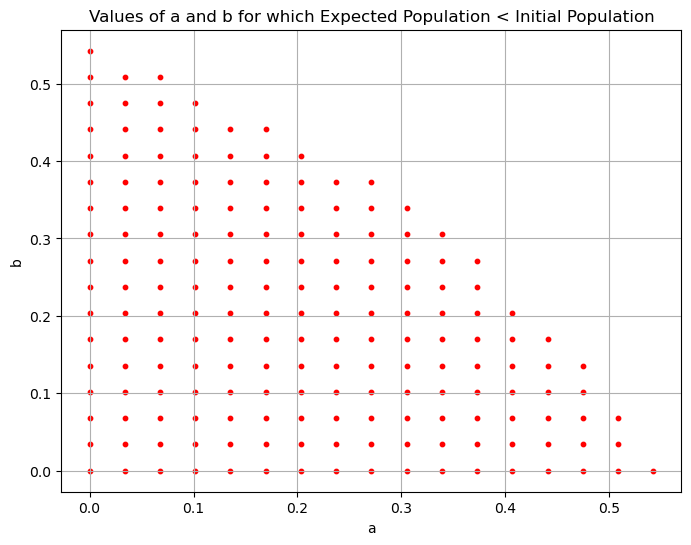

In [9]:
p1, p2, p3 = 7/20, 11/50, 457/1000  # Probabilities p1, p2, and p3
p1f, p2f, p3f = 389/1000, 151/611, 7/10  # Probabilities p1f, p2f, and p3f
m12, m23 = 4/25, 37/100  # Transition probabilities m12 and m23
m12f, m23f = 23/100, 2/5  # Transition probabilities m12f and m23f
f2m, f2f = 1, 2  # Factors f2m and f2f

import matplotlib.pyplot as plt  # Import the matplotlib library for plotting
import numpy as np  # Import the numpy library for numerical operations

# Define the initial population as an array sum
initial_population = np.array([50, 50, 50, 50, 50, 50]).sum()

# Define a function to check if the final population is less than the initial population
def is_final_population_less_than_initial(a: float, b: float) -> bool:
    L = np.array([  # Create a matrix L
        [p1, 0, 0, 0, f2m, 0],  # Row 1
        [m12, p2, 0, 0, 0, 0],  # Row 2
        [0, m23, p3, 0, 0, 0],  # Row 3
        [0, 0, 0, a, f2f, 0],  # Row 4
        [0, 0, 0, m12f, b, 0],  # Row 5
        [0, 0, 0, 0, m23f, p3f]  # Row 6
    ])
    Zk = np.array([  # Create an array Zk
        [50],  # Initial population values
        [50],
        [50],
        [50],
        [50],
        [50]
    ])
    for _ in range(50):  # Iterate 50 times to compute the final population
        Zk = np.matmul(L, Zk)  # Matrix multiplication to calculate the final population
    return Zk.sum() < initial_population  # Check if the final population is less than the initial population

# Create lists to store the values of a and b that result in expected population < X
valid_a_values, valid_b_values = [], []

a_values = b_values = np.linspace(0, 2, 60)  # Create arrays of values from 0 to 1 with 100 points

for a in a_values:  # Iterate over a_values
    for b in b_values:  # Iterate over b_values
        if is_final_population_less_than_initial(a, b):  # Check if final population is less than initial
            valid_a_values.append(a)  # Append valid 'a' values
            valid_b_values.append(b)  # Append valid 'b' values

# Create a scatter plot to visualize the results
plt.figure(figsize=(8, 6))  # Set the figure size
plt.scatter(valid_a_values, valid_b_values, s=10, c='red', marker='o')  # Create a scatter plot
plt.xlabel('a')  # Set the x-axis label
plt.ylabel('b')  # Set the y-axis label
plt.title(f'Values of a and b for which Expected Population < Initial Population')  # Set the title
plt.grid(True)  # Display a grid on the plot
plt.show()  # Show the plot